In [15]:
#Reference
https://github.com/celestedrobinson/School-Performance/blob/master/School%20Visualizations.ipynb

In [1]:
import pandas as pd

school_unfiltered = pd.read_csv("grades_2014.csv")
print(school_unfiltered.head())

                                        District  \
0  ACADEMY FOR MATH ENGINEERING & SCIENCE (AMES)   
1                                ALIANZA ACADEMY   
2                                ALPINE DISTRICT   
3                                ALPINE DISTRICT   
4                                ALPINE DISTRICT   

                                          School                 School Type  \
0  ACADEMY FOR MATH ENGINEERING & SCIENCE (AMES)          High School Report   
1                                ALIANZA ACADEMY  Elem/Middle/Jr High School   
2                           ALPINE ONLINE SCHOOL  Elem/Middle/Jr High School   
3                                  ALPINE SCHOOL  Elem/Middle/Jr High School   
4                             AMERICAN FORK HIGH          High School Report   

   Overall Points  Overall Possible Grade All Students Participation  \
0             566               900     B                       100%   
1             145               600     F                     

In [2]:
# Here we will filter out anything that isn't right
# TODO: Make sure we filter all NaNs in all of the columns that matter.
school = school_unfiltered[school_unfiltered['Overall Possible'] != 0]
school = school_unfiltered[school_unfiltered['Growth ELA All Students'] != 0]
school.reset_index(inplace=True)

In [3]:
# Here we create percentages of each column pair that has has possible points
school = school.assign(overall_percent = (school['Overall Points'].div(school['Overall Possible'])*100))
school = school.assign(growth_percent = (school['Growth ELA All Students']/school['Growth ELA All Students Possible'])*100)
school = school.assign(growth_math_percent = school['Growth Math All Students'].div(school['Growth Math All Students Possible'])*100)
school = school.assign(growth_science_percent = school['Growth Science All Students'].div(school['Growth Science All Students Possible'])*100)
school = school.assign(growth_below_percent = school['Growth ELA Below Proficient'].div(school['Growth ELA Below Proficient Possible'])*100)
school = school.assign(growth_math_below_percent = school['Growth Math Below Proficient'].div(school['Growth Math Below Proficient Possible'])*100)
school = school.assign(growth_science_below_percent = school['Growth Science Below Proficient'].div(school['Growth Science Below Proficient Possible'])*100)
school = school.assign(ela_proficient_percent = school['ELA Proficient'].div(school['ELA Proficient Possible'])*100)
school = school.assign(math_proficient_percent = school['Math Proficient'].div(school['Math Proficient Possible'])*100)
school = school.assign(science_proficient_percent = school['Science Proficient'].div(school['Science Proficient Possible'])*100)

In [4]:
percent_columns = ['overall_percent', 'growth_percent', 'growth_math_percent', 'growth_science_percent', 'growth_below_percent', 'growth_math_below_percent','growth_science_below_percent']
print(school[percent_columns].head())

   overall_percent  growth_percent  growth_math_percent  \
0        62.888889            72.0                 66.0   
1        24.166667            28.0                 32.0   
2        46.166667            42.0                 62.0   
3        57.333333            66.0                 70.0   
4        59.333333            66.0                 72.0   

   growth_science_percent  growth_below_percent  growth_math_below_percent  \
0                    74.0                  56.0                       62.0   
1                    36.0                  26.0                       34.0   
2                    58.0                  46.0                       70.0   
3                    50.0                  70.0                       70.0   
4                    74.0                  60.0                       50.0   

   growth_science_below_percent  
0                          80.0  
1                          30.0  
2                          66.0  
3                          64.0  
4     

In [5]:
means = [school[x].mean() for x in percent_columns]
maxes = [school[x].max() for x in percent_columns]
mins = [school[x].min() for x in percent_columns]
medians = [school[x].median() for x in percent_columns]
variances = [school[x].var(axis=0) for x in percent_columns]

mean_dict = {}
for i in range(len(means)):
    mean_dict[percent_columns[i]] = means[i]
    print(percent_columns[i], '\nmean: ', means[i], '\tmedian: ', medians[i], '\tmax: ', maxes[i], '\tmin: ', mins[i], '\tvariance: ', variances[i])
print("Rows: ", school.shape[0])

overall_percent 
mean:  51.712984346933524 	median:  52.33333333333333 	max:  90.66666666666666 	min:  19.5 	variance:  101.45132396855512
growth_percent 
mean:  59.907091391733026 	median:  62.0 	max:  92.0 	min:  14.000000000000002 	variance:  132.6728312038629
growth_math_percent 
mean:  60.24914675767918 	median:  60.0 	max:  92.0 	min:  0.0 	variance:  140.95190227038924
growth_science_percent 
mean:  59.745775729646695 	median:  60.0 	max:  90.0 	min:  20.0 	variance:  130.87929137499418
growth_below_percent 
mean:  60.83892339544512 	median:  62.0 	max:  100.0 	min:  16.0 	variance:  181.71268982897786
growth_math_below_percent 
mean:  60.96877637130798 	median:  62.0 	max:  100.0 	min:  10.0 	variance:  162.7453975995538
growth_science_below_percent 
mean:  60.47654628476547 	median:  60.0 	max:  100.0 	min:  14.000000000000002 	variance:  160.01978035401314
Rows:  897


In [6]:
school.to_csv('filtered_data.csv')

In [7]:
school = pd.read_csv("filtered_data.csv")
print(school.columns)

Index(['Unnamed: 0', 'index', 'District', 'School', 'School Type',
       'Overall Points', 'Overall Possible', 'Grade',
       'All Students Participation', 'Below Proficient Participation',
       'Growth ELA All Students', 'Growth ELA All Students Possible',
       'Growth Math All Students', 'Growth Math All Students Possible',
       'Growth Science All Students', 'Growth Science All Students Possible',
       'Growth ELA Below Proficient', 'Growth ELA Below Proficient Possible',
       'Growth Math Below Proficient', 'Growth Math Below Proficient Possible',
       'Growth Science Below Proficient',
       'Growth Science Below Proficient Possible', 'ELA Proficient',
       'ELA Proficient Possible', 'Math Proficient',
       'Math Proficient Possible', 'Science Proficient',
       'Science Proficient Possible', 'College Career Readiness GRAD',
       'College Career Readiness GRAD Possible',
       'Number of Students Meeting All Four CCR Benchmarks ACT',
       'College Career R

In [8]:
import matplotlib.pyplot as plt

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

# But matplotlib doesn't recognize these colors, so we have to go through and change them:
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

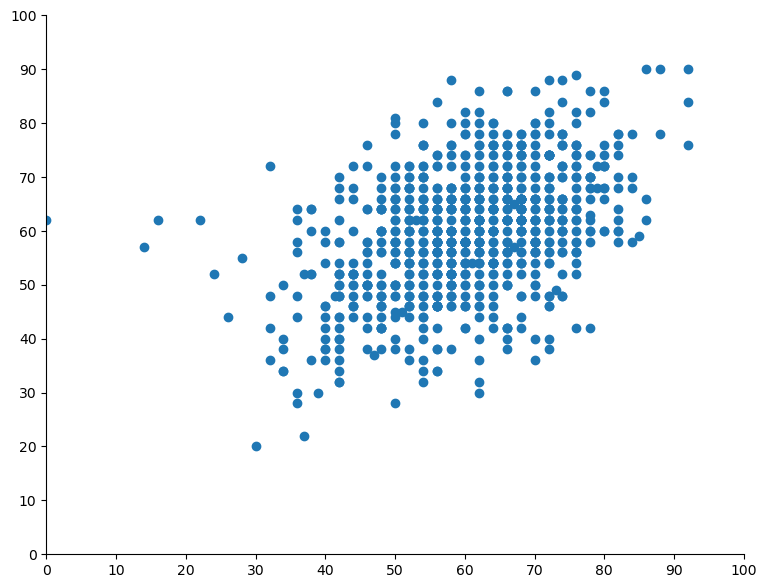

In [9]:
percent_columns = list(filter(lambda x : 'percent' in x, school.columns))
plt.figure(figsize=(9, 7))
ax = plt.subplot(111)   
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(range(0, 101, 10))
plt.scatter(school.growth_math_percent, school.growth_science_percent, color=[tableau20[0]])

plt.show()

In [10]:
# Makes titles readable
def clean_label(label):
    lst = label.split('_')
    s = ' '
    for i in range(len(lst)):
        lst[i] = lst[i].capitalize()
    new_label = s.join(lst)
    return new_label  

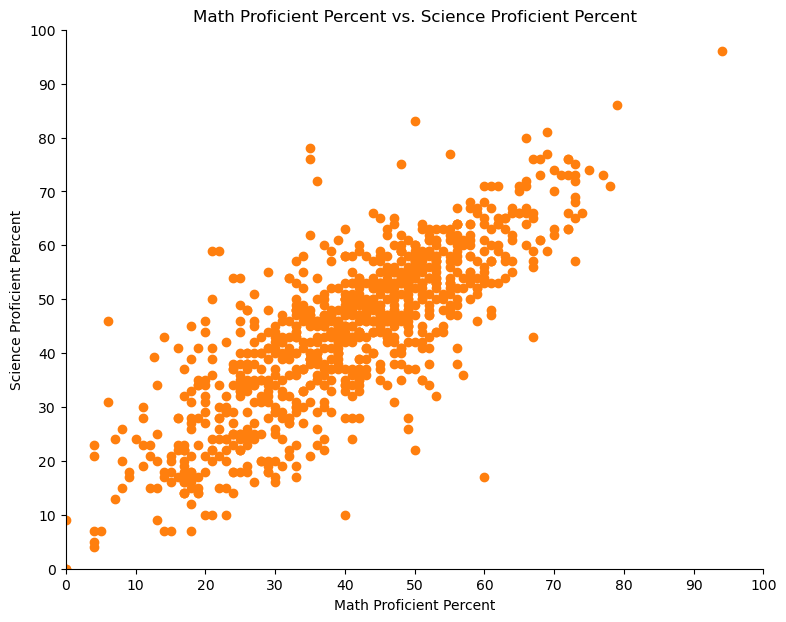

In [11]:
# We create a function so we don't have to make the same changes everytime
def make_figure(x_name, y_name, c):
    plt.figure(figsize=(9, 7))
    ax = plt.subplot(1,1,1)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    x_c = clean_label(x_name)
    y_c = clean_label(y_name)
    ax.set_title(x_c + ' vs. ' + y_c)
    ax.set_xlabel(x_c)
    ax.set_ylabel(y_c)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xticks(range(0, 101, 10))
    plt.yticks(range(0, 101, 10))
    plt.scatter(school[x_name], school[y_name], color=c)
    plt.show()
    
make_figure('math_proficient_percent', 'science_proficient_percent', tableau20[2])

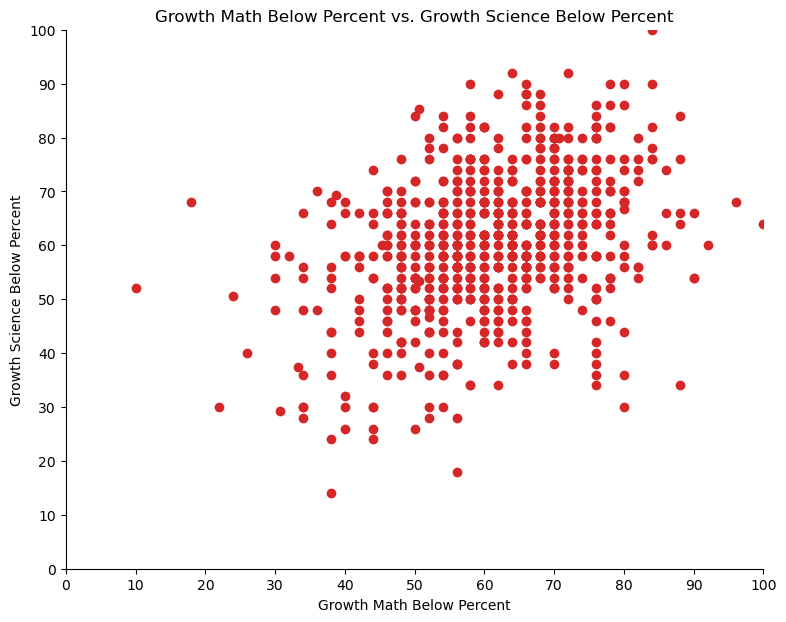

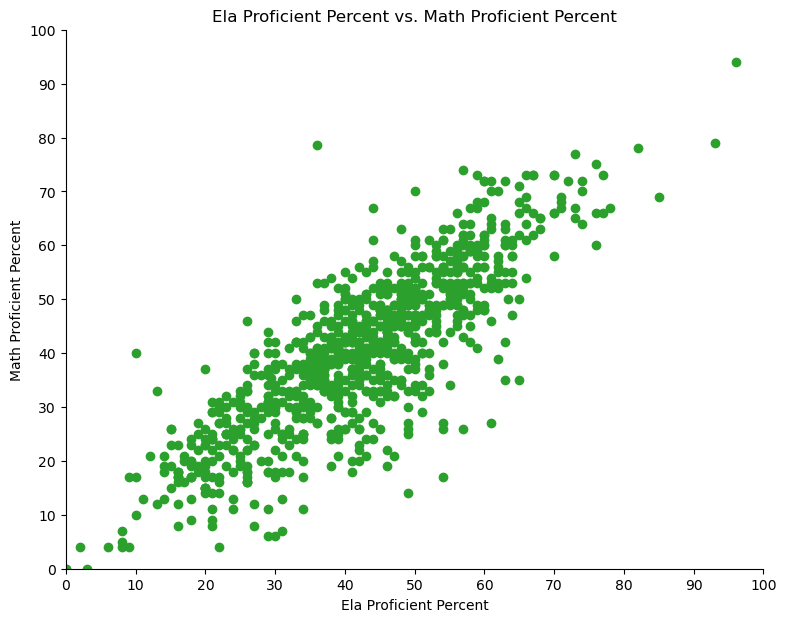

In [12]:
make_figure('growth_math_below_percent',
       'growth_science_below_percent', tableau20[6])
make_figure('ela_proficient_percent', 'math_proficient_percent', tableau20[4])

In [13]:
def make_hist_figure(x, color):
    plt.figure(figsize=(9,7))
    ax = plt.subplot(1,1,1)
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)
    x_title = clean_label(x)
    ax.set_title(x_title)
    ax.set_xlabel(x_title)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    plt.xticks(range(0, 101, 10))
    plt.xlim(0, 100)
    plt.hist(school[x], bins=10, range=(0,100), color=color)
    plt.show()

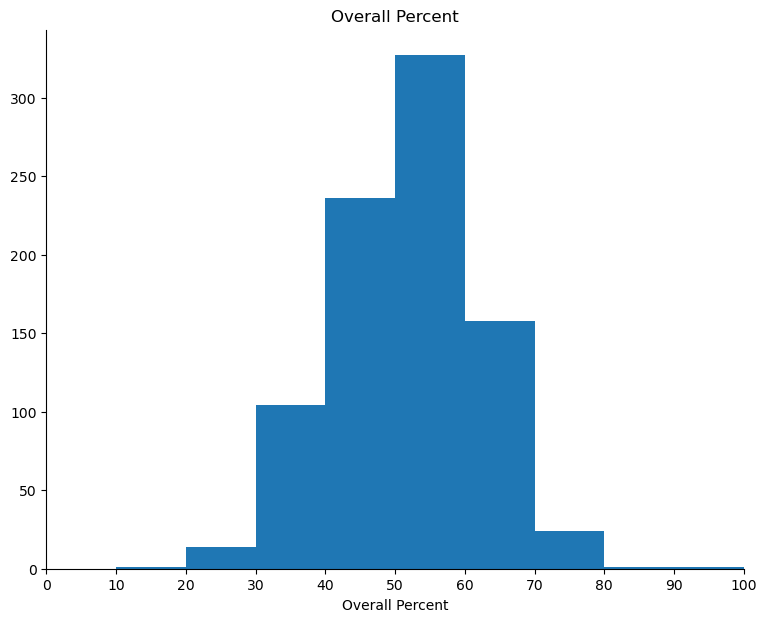

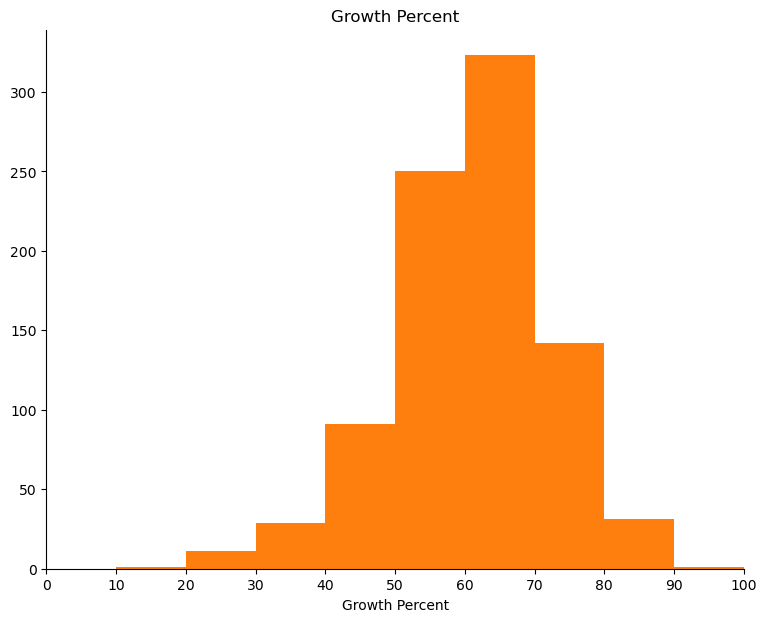

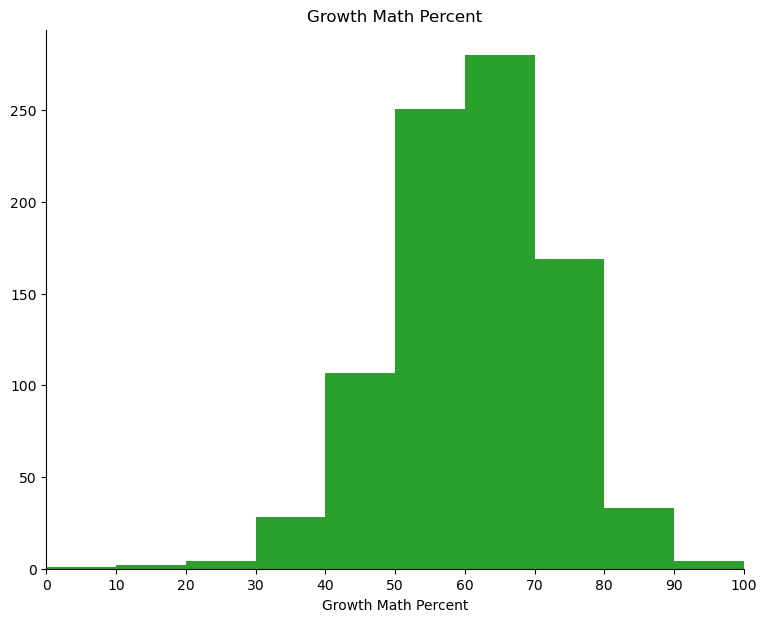

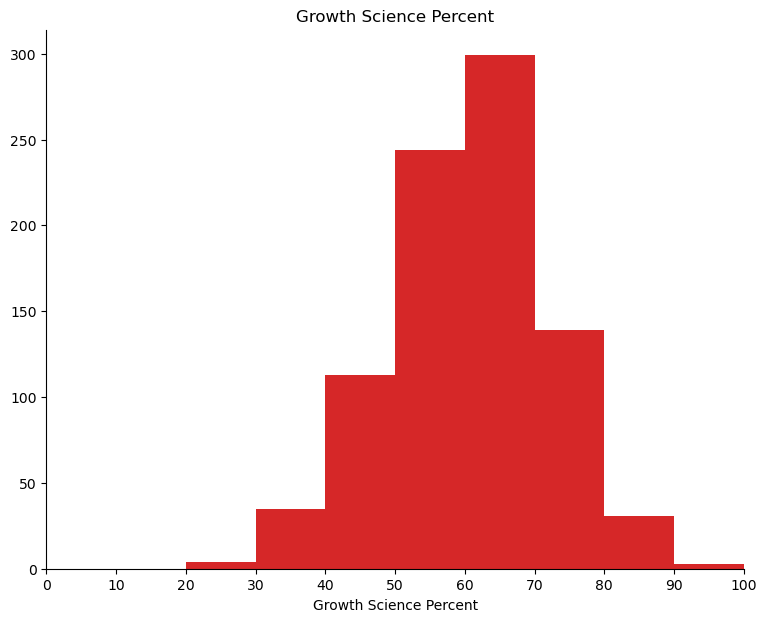

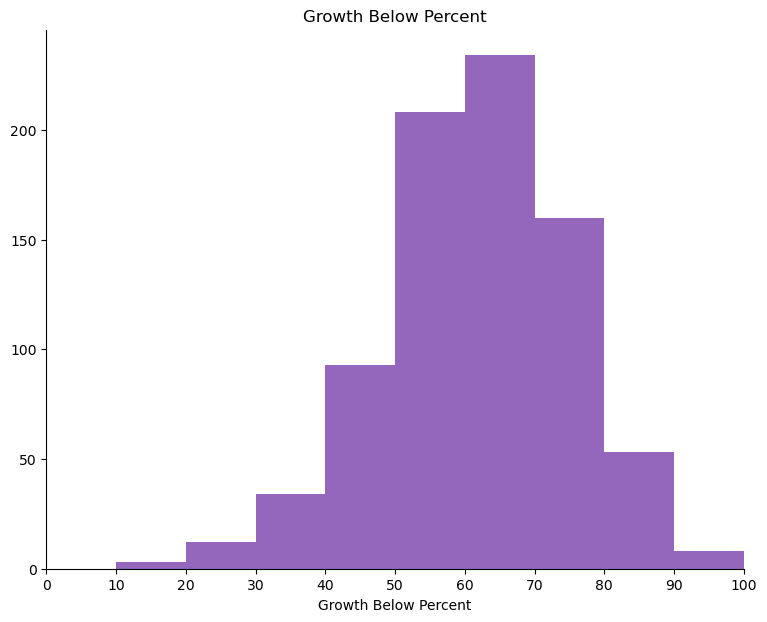

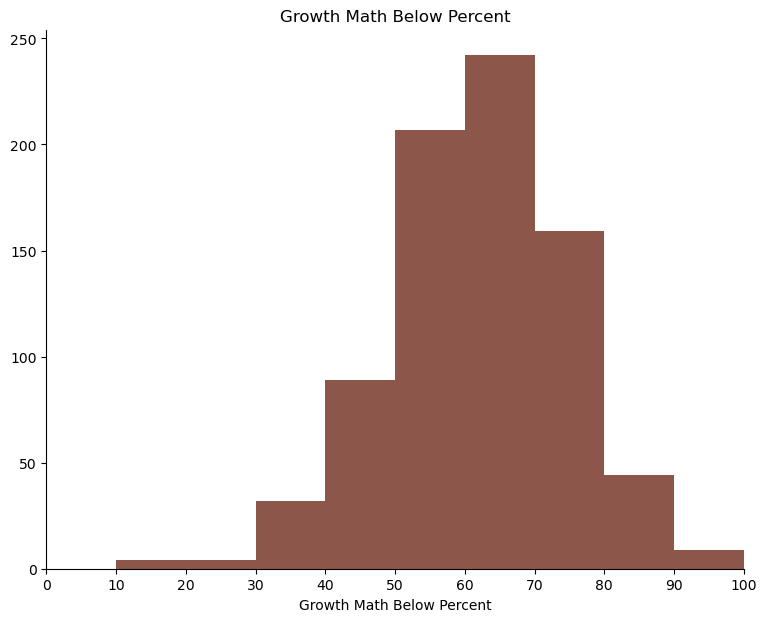

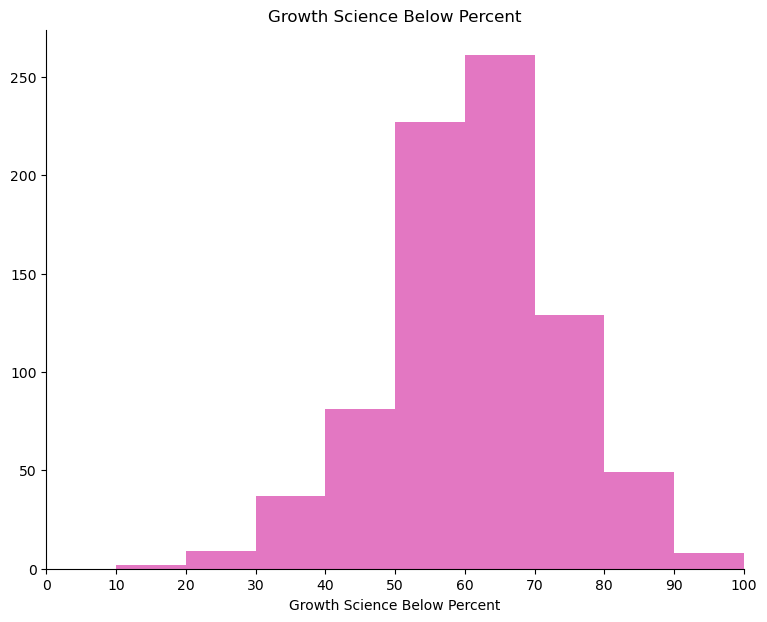

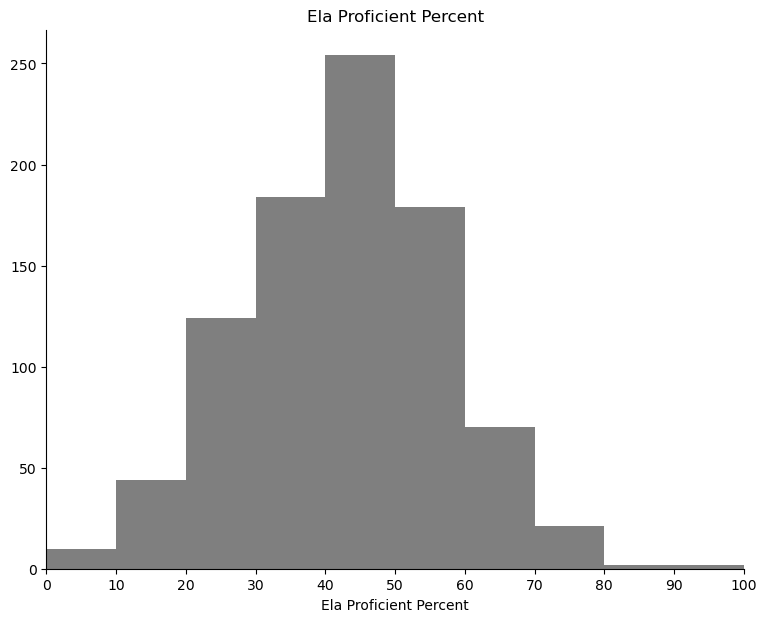

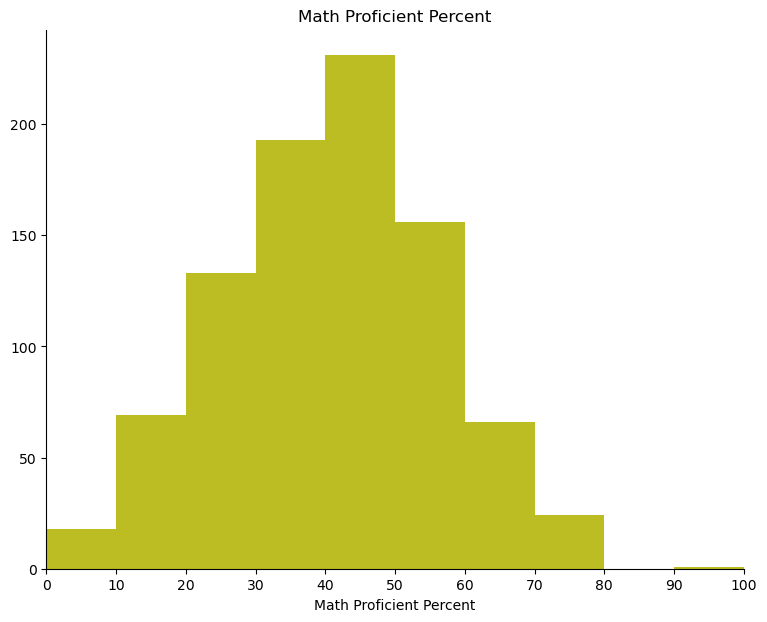

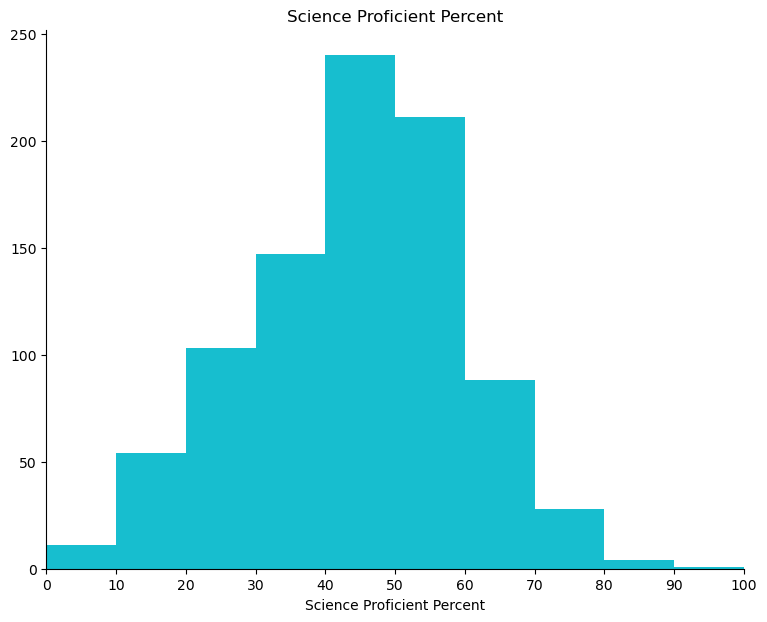

In [14]:
for i in range(len(percent_columns)):
    make_hist_figure(percent_columns[i], tableau20[i*2])